
<br>
    The objective of this exercise is to study the signal of ECG during atrial<br>
    fibrilation (AF). The signal analysed contains different type of AF with<br>
    stable repolarisation loops and random AF.<br>


In [1]:
import numpy as np
import pylab as py
py.ion()
py.close('all')
import scipy.signal as sp
import m03_ex2_ext as my_plot


<br>
    The first signal is an ECG with atrial fibrilation.<br>


Q: What are the differences of this ECG with a normal ECG?<br>
no p wave and the is oscillations even drungin the T wave that show artrial fribrilation activity

In [2]:

ecg = np.genfromtxt('ecg_af.dat')
ecg_fs = 300
t_ecg = np.arange(len(ecg))/ecg_fs

(210.0, 215.0)

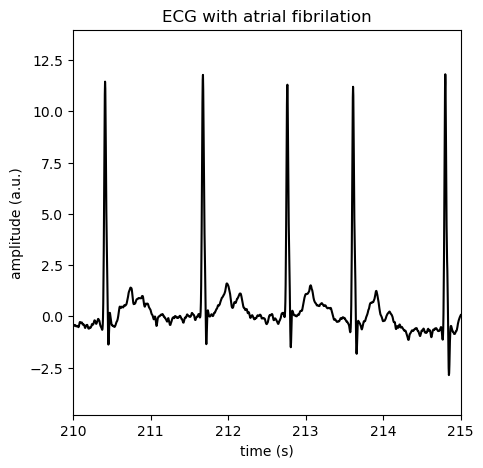

In [14]:
py.figure(1,figsize=[5,5])
py.plot(t_ecg, ecg, 'k')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG with atrial fibrilation')
py.xlim(210, 215)


<br>
    We compute the autocorelation of the ECG signal.<br>
    In order to dircard the modulation of the baseline we first apply a<br>
    high-pass filter with a cut-off frequency of 0.5 Hz.<br>
    

Q: Do you see a specific pattern that permits to characterize the atrial fibrilation?<br>
the rxx signal shows few oscialltion around 0 meaning that the signal is relativelly random and lost its periodicity 

In [3]:
b, a = sp.butter(2, 0.5/ecg_fs*2, btype='high')

In [4]:
ecg_hp = sp.filtfilt(b, a, ecg)

In [5]:
rxx_ecg = np.correlate(ecg_hp, ecg_hp, mode='full') 
k = np.arange(len(rxx_ecg))-len(rxx_ecg)//2

(-500.0, 500.0)

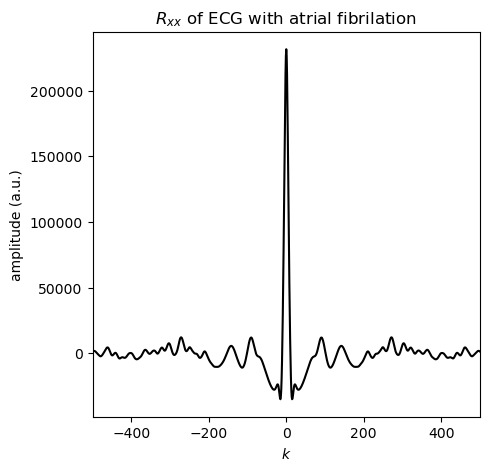

In [6]:
py.figure(2,figsize=[5,5])
py.plot(k, rxx_ecg, 'k')
py.xlabel('$k$')
py.ylabel('amplitude (a.u.)')
py.title('$R_{xx}$ of ECG with atrial fibrilation')
py.xlim(-500, 500)

In [7]:
f, ECG = sp.welch(ecg_hp, nperseg=500, nfft=4096, noverlap=250, fs=ecg_fs)

Compute the PSD of the ECG signal.<br>
  

  Q: What do you see?
  high power in higher frequencies than normal (heart rate is aroung 1Hz) which is normal for atrial fribilation

(0.0, 60.0)

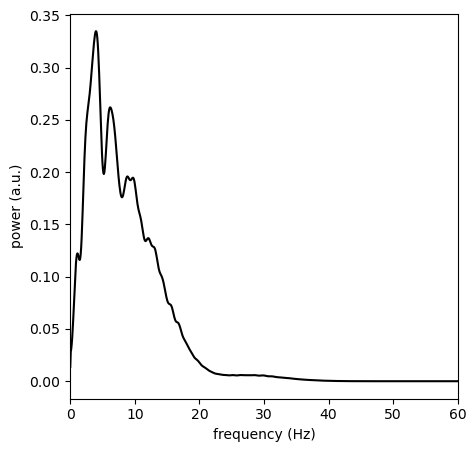

In [8]:
py.figure(3, figsize=[5,5])
py.clf()
py.plot(f, ECG, 'k')
py.xlabel('frequency (Hz)')
py.ylabel('power (a.u.)')
py.xlim(0,60)


<br>
    In order to higlight the signal related to the repolarisation of the<br>
    atria and ECG signal with atrial fibrilation has been process, keeping only<br>
    the P wave (repolarisation of the atria) and the QRST waves have been<br>
    removed.<br>
    During the measurement 4 time segments exhibit different behaviors.<br>
    

Q: What are the difference between the different segments ?<br>
none of them have the same "picks" and their amplitude changes quite in a artbitrary manner between each other
however the 4rth picture stands out as the amplitude seems small thant the others

In [9]:
p_wave = np.genfromtxt('AF_sync.dat')
p_wave_fs = 50
t_p_wave = np.arange(len(p_wave))/p_wave_fs

In [10]:
segments = [1500, 2000, 2500, 3000, 3500]

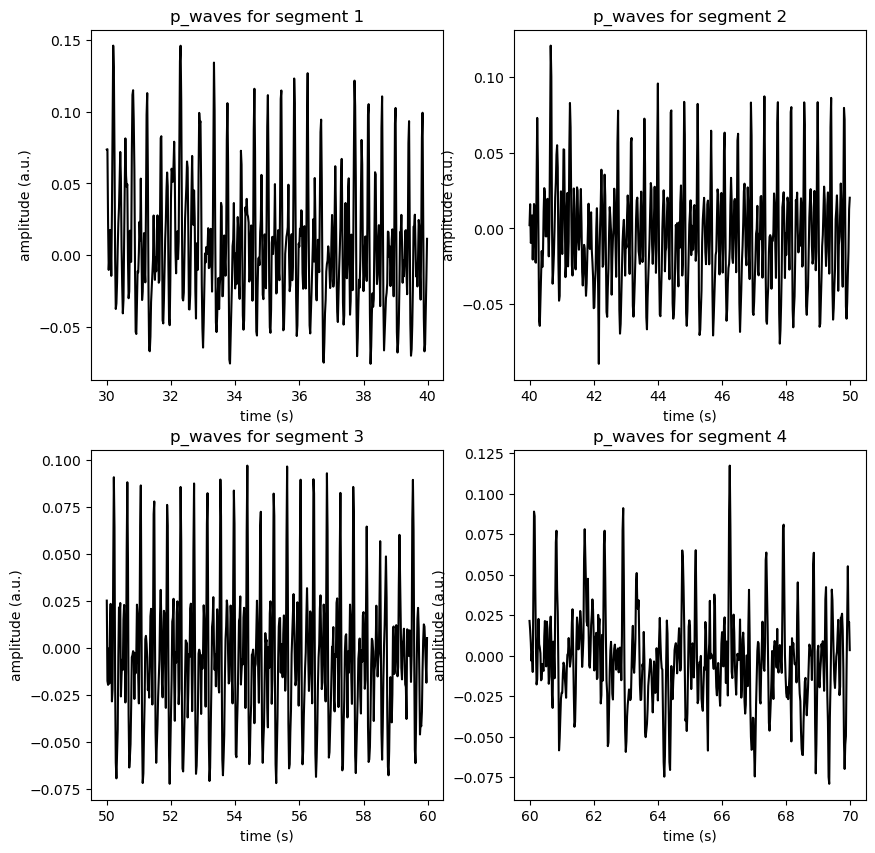

In [11]:
py.figure(4,figsize=[10,10])
for n in range(len(segments)-1):
    py.subplot(2, 2, int(n+1))
    idx = np.arange(segments[n], segments[n+1])
    py.plot(t_p_wave[idx], p_wave[idx], 'k')
    py.xlabel('time (s)')
    py.ylabel('amplitude (a.u.)')
    py.title('p_waves for segment '+str(n+1))


<br>
    We compute the autocorelation of the p_wave signal.<br>
    In order to dircard the modulation of the baseline we first apply a<br>
    high-pass filter with a cut-off frequency of 0.5 Hz.<br>
    <br>
    

Q: Do you see a specific pattern that permits to characterize the atrial  fibrilation?<br>
the pick around  0


    Q: Discuss the organisation of the signals. Which one is the more organised, which one is closer to a noise?<br>
     since there is less pics at the more or lesss amplitude it seems that segment 4 is closer to be a noise
     the most organsied ->


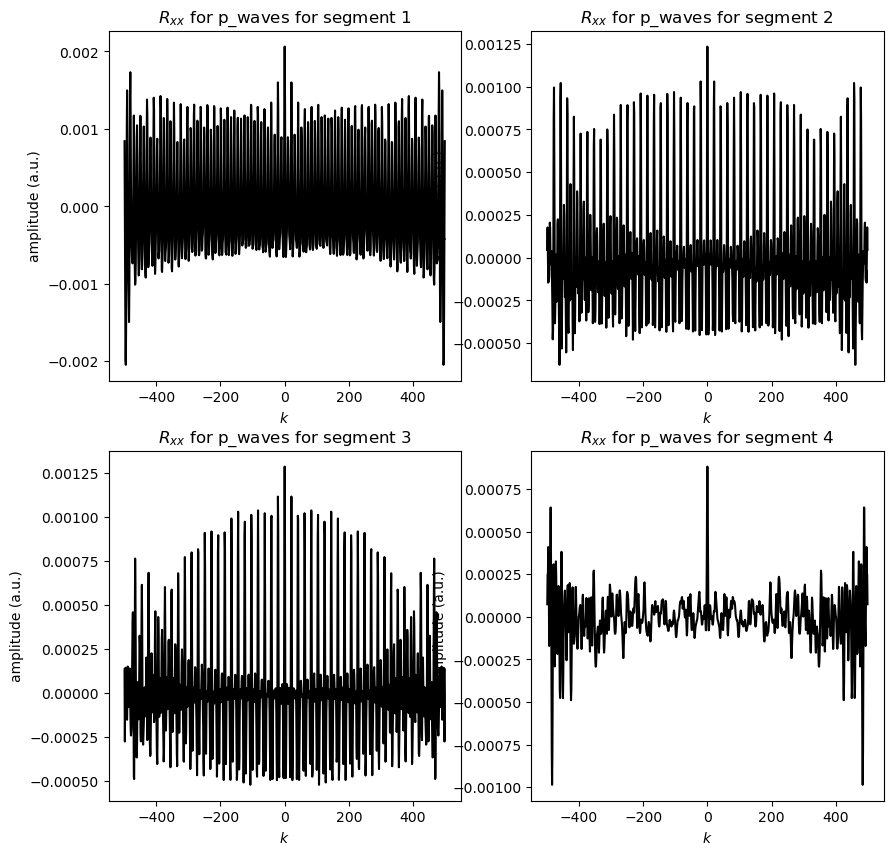

In [12]:
py.figure(5,figsize=[10,10])
for n in range(len(segments)-1):
    py.subplot(2, 2, int(n+1))
    idx = np.arange(segments[n], segments[n+1])
    rxx_p_wave = np.correlate(p_wave[idx], p_wave[idx], mode='full') 
    rxx_p_wave /= np.correlate(np.ones(len(idx)), np.ones(len(idx)), mode='full')
    k = np.arange(len(rxx_p_wave))-len(rxx_p_wave)//2
    py.plot(k, rxx_p_wave, 'k')
    py.xlabel('$k$')
    py.ylabel('amplitude (a.u.)')
    py.title('$R_{xx}$ for p_waves for segment '+str(n+1))


<br>
    Compute the PSD of the p_wave signal.<br>
    

Q: What do you see?<br>
    we see that for the same segement there is several (3-5) frequencies that stand out showing that they the atria is beating at several frequencies 
    in the segemnt 4 those frequencies much less distinguishable 

Q: Which one is the more organised?<br>
the segement 3 is the oney with the easiet distinguichable frequencies

Q: Which ones looks like a noise?<br>
   segement 4 since as said before it has the less disguished frequencies hence we can assume that is contaminated with noise 

 Q: Which ones exhibit a sustained repolarisation loop?<br>


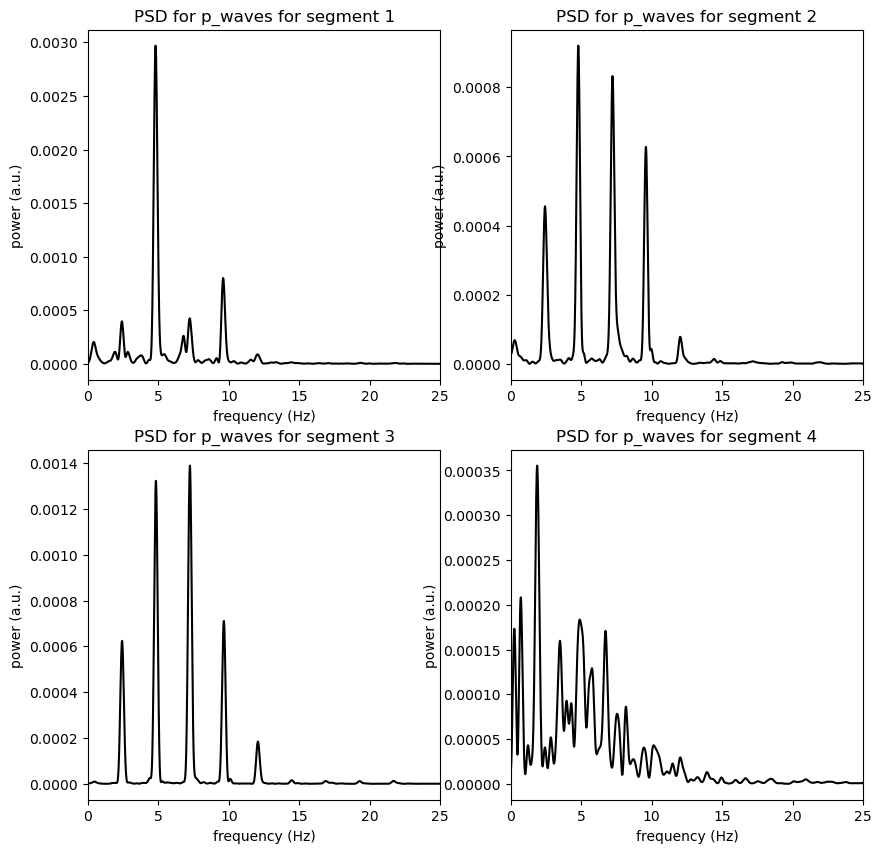

In [13]:
py.figure(7, figsize=[10,10])
for n in range(len(segments)-1):
    idx = np.arange(segments[n], segments[n+1])
    f, P_WAVE = sp.welch(p_wave[idx], nperseg=250, nfft=4096, noverlap=100, fs=p_wave_fs)
    py.subplot(2, 2, int(n+1))
    py.plot(f, P_WAVE, 'k')
    py.xlabel('frequency (Hz)')
    py.ylabel('power (a.u.)')
    py.xlim(0,25)
    py.title('PSD for p_waves for segment '+str(n+1))